<a href="https://colab.research.google.com/github/AmirAliShar057/Basic-of-Python/blob/Basic-of-python/Entropy%2C_Gini_impurity_and_information_gain_Decision_Tree_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

In [ ]:
#example data set
#we have the data set with two class
#data set has the 10 elament 4 elemnet A class and 6 element B class
n_A=4
n_B=6
total=n_A+n_B

#calculate the proportion
p_A=n_A/total
p_B=n_B/total

print(p_A)
print(p_B)


0.4
0.6


In [ ]:
#calculate the entropy
entropy= -p_A * math.log2(p_A) -p_B * math.log2(p_B)
print(f"Entropy = {entropy:.2f}")

Entropy = 0.97


In [ ]:
 #gini impurity
gini=1 - p_A **2 - p_B**2
print(f"Gini impurity :{gini:0.2f}")

Gini impurity :0.48


In [ ]:
#Information Gain
#Assuming a split on some features divides the dataset into two subset
#set 1 :2 element of A 3 of B
#subset 2: 2 element of A ,3 of B
#Entropy and size of each
A1,B1=2,3
A2,B2=2,3

p_1_A=A1/(A1+B1)
p_1_B=B1/(A1+B1)

entropy_1=-p_1_A * math.log2(p_1_A) -p_1_B * math.log2(p_1_B)

p_2_A=A2/(A2+B2)
p_2_B=B2/(A2+B2)

entropy_2=-p_2_A * math.log2(p_2_A) -p_2_B * math.log2(p_2_B)

info_gain=entropy - ((A1+B1)/total *entropy_1 + (A2 + B2)/total*entropy_2)

print(f"Information Gain :{info_gain :.2f}")


Information Gain :0.00


# Decision Tree Example

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
#load the data set
titanic=sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#Drop the deck coloumn
titanic.drop("deck",axis=1,inplace =True)

#Impute the missimg values
imputer=SimpleImputer(strategy="median")
titanic[['age']]=imputer.fit_transform(titanic[['age']])

#impute the categorical data
imputer=SimpleImputer(strategy="most_frequent")
titanic[['embarked','embark_town']]=imputer.fit_transform(titanic[['embarked','embark_town']])



In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
#Encode the data
le=LabelEncoder()
for i in titanic.select_dtypes(include=['category','object']):
    titanic[i]=le.fit_transform(titanic[i])

#other method
"""for col in titanic.columns:
    if titanic[col].dtype =='object' or titanic[col].dtype=='category':
        titanic[col]=LabelEncoder().fit_transform(titanic[col])"""

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [ ]:
#train test and split the data

X=titanic.drop('survived',axis=1)
Y=titanic["survived"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Build the model
model=DecisionTreeClassifier()

model.fit(X_train,Y_train)

#Predict the model
Y_pred=model.predict(X_test)

#Evaluate the model
print("Accuracy score = ",accuracy_score(Y_test, Y_pred))
print("classification matrix  \n",classification_report(Y_test,Y_pred))
print('Confusion matrix \n',confusion_matrix(Y_test,Y_pred))

Accuracy score =  1.0
classification matrix  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Confusion matrix 
 [[105   0]
 [  0  74]]


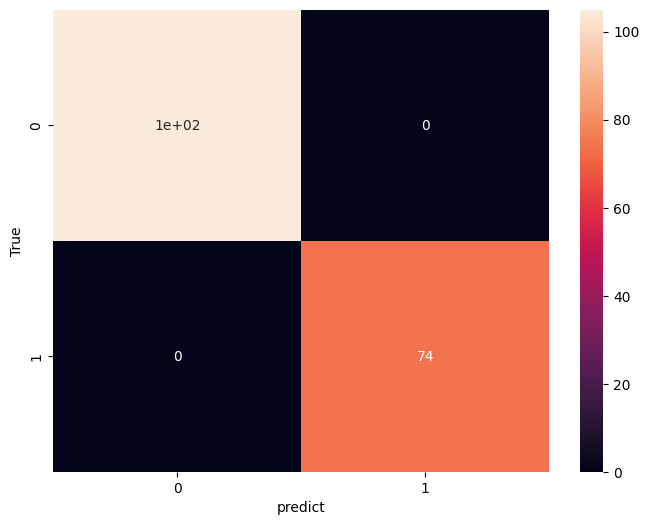

In [ ]:
#Draw the evaluation matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.xlabel("predict")
plt.ylabel("True")
plt.show()

In [ ]:
model.predict([[1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False]])
#!--> represent alive

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.tree import export_graphviz

# Save the model
graph=export_graphviz(model,
                out_file=r"C:\Users\HP\Desktop\Model_Save_ML\Decision_tree_Model.dot",
                feature_names=X.columns,
                filled=True,
                rounded=True)


# Regression using Decisioin Tree

In [ ]:
# prompt: Regression using Decisioin Tree

#Decision Tree Regression
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

#Load the data set
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#check the missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Seperate the feature and target value
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

#Train test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)
#Build the model
model=DecisionTreeRegressor(max_depth=5) #incresing of depth number the incresing the negative r2 score

#Trian the model
model.fit(X_train,Y_train)

#Predict the model
Y_pred=model.predict(X_test)

#Evaluate the model
print("MSE = ",mean_squared_error(Y_test,Y_pred))
print('r2_score = ',r2_score(Y_test,Y_pred))
print("RMSE= ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("MAE = ",mean_absolute_error(Y_test,Y_pred))



MSE =  0.16061887691279567
r2_score =  0.29458568798817353
RMSE=  0.4007728495205179
MAE =  0.25918489620578206


In [ ]:
model.predict([[5,121,72,23,112,26.2,0.245,30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.])